In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
abc_1 = pd.read_csv("ABC Company.csv")

In [117]:
abc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


From the above info it is evident that the height column is not wholly an integer column & There are missing values present in College & salary

In [118]:
abc_1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [119]:

abc_1.describe()


,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


As a part of preprocessing the hegiht column has to be iterated during preprocessing


## Preprocessing:

### Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis

In [120]:
abc_row_count = len(abc_1) # To get no. of rows in abc_1
abc_row_count    

458

In [121]:
abc_1['Height']=np.random.randint(150,180,size=abc_row_count) # to replace the values in Height Colummn with random numbers ranging between 150 & 180
abc_1 #show the iterated dataset

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,156,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,178,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,150,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,160,231,Kansas,947276.0


In [122]:
abc_1.isnull().sum() #to get the sum of null cells in each colummn

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

It is observed that the dataset is having null values in College & Salary Columns.
As the College name imposes no certain merit in the analysis we can fill the Nan cells with Unknown


In [123]:
abc_1['College'].fillna('Unknown', inplace=True)
abc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB


C:\Users\Babitos Patisserie\AppData\Local\Temp\ipykernel_4328\1637607935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  abc_1['College'].fillna('Unknown', inplace=True)


So from above we have now iterated the College column & can proceed to the next column containing null values i.e, Salary 

#### The observation in salary column is 
####           Total no. of non null vales = 447
####           Total number of rows = 458
####           Total missing values = 458 - 447 = 11

In [124]:
print ("Percentage of Missing values in  Salary Column = ", round(11/458*100, 2))

Percentage of Missing values in  Salary Column =  2.4


As the missing values corresponds only 2.4% of the total value, we can drop the rows with misssing values; By which we can avoid any uncertainity  or complexity as the values are estimated not actual

In [125]:
abc_1.dropna(subset=['Salary'],inplace = True) #Drpping rows with missing salaries
abc_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      447 non-null    object 
 1   Team      447 non-null    object 
 2   Number    447 non-null    int64  
 3   Position  447 non-null    object 
 4   Age       447 non-null    int64  
 5   Height    447 non-null    int32  
 6   Weight    447 non-null    int64  
 7   College   447 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 33.2+ KB


By this step the data preprocessing of the data is completed and we can move forward with the analysis

In [126]:
abc_1.describe()

,Number,Age,Height,Weight,Salary
count,447.000000,447.000000,447.000000,447.000000,4.470000e+02
mean,17.718121,26.914989,164.093960,221.774049,4.833970e+06
std,16.026218,4.394955,8.850534,26.132217,5.226620e+06
min,0.000000,19.000000,150.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,157.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,163.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,172.000000,240.000000,6.500000e+06
max,99.000000,40.000000,179.000000,307.000000,2.500000e+07


The overall statement of the data is taken 

## Analysis Tasks:

### Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [127]:
abc_1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,156,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,178,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,150,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,160,231,Kansas,947276.0


In [128]:
emp_count = len(abc_1) # Total employees = total rows
print ("Total number of Employees = ", emp_count)


Total number of Employees =  447


In [129]:
dis_emp = abc_1['Team'].value_counts() # Distribution of employees across each team
per_split = (dis_emp/emp_count)*100 # Percentage split for employee
# Now we have to create a dataframe to store the obtained values (dis_emp & per_split) in order to tabulate and for graphical representation
abc_2 = pd.DataFrame({'Employee distribution': dis_emp, 'Percentage Split' : per_split})
print ("The distribution of Employees across each team & their percentage split is as follows - \n", abc_2)

The distribution of Employees across each team & their percentage split is as follows - 
                         Employee distribution  Percentage Split
Team                                                           
New Orleans Pelicans                       19          4.250559
Utah Jazz                                  16          3.579418
New York Knicks                            16          3.579418
Milwaukee Bucks                            16          3.579418
Indiana Pacers                             15          3.355705
Portland Trail Blazers                     15          3.355705
Oklahoma City Thunder                      15          3.355705
Washington Wizards                         15          3.355705
Charlotte Hornets                          15          3.355705
Atlanta Hawks                              15          3.355705
San Antonio Spurs                          15          3.355705
Houston Rockets                            15          3.355705
Brooklyn Nets 

The above Distribution of Enployees across teams which can be plotted using a Barchart & their percentage split can be effectively comunicated using a Pie chart as follows

In [130]:
abc_Teams = abc_2.index.tolist() # To make a list of Teams for labelling the chart
abc_Teams

['New Orleans Pelicans',
 'Utah Jazz',
 'New York Knicks',
 'Milwaukee Bucks',
 'Indiana Pacers',
 'Portland Trail Blazers',
 'Oklahoma City Thunder',
 'Washington Wizards',
 'Charlotte Hornets',
 'Atlanta Hawks',
 'San Antonio Spurs',
 'Houston Rockets',
 'Brooklyn Nets',
 'Dallas Mavericks',
 'Detroit Pistons',
 'Chicago Bulls',
 'Sacramento Kings',
 'Phoenix Suns',
 'Los Angeles Lakers',
 'Los Angeles Clippers',
 'Golden State Warriors',
 'Toronto Raptors',
 'Cleveland Cavaliers',
 'Memphis Grizzlies',
 'Orlando Magic',
 'Denver Nuggets',
 'Philadelphia 76ers',
 'Boston Celtics',
 'Miami Heat',
 'Minnesota Timberwolves']

The Distribution of Employees across Teams is Plotted using Barchar below

C:\Users\Babitos Patisserie\AppData\Local\Temp\ipykernel_4328\75807907.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, dis_emp[i]+0.2,dis_emp[i], ha='center')


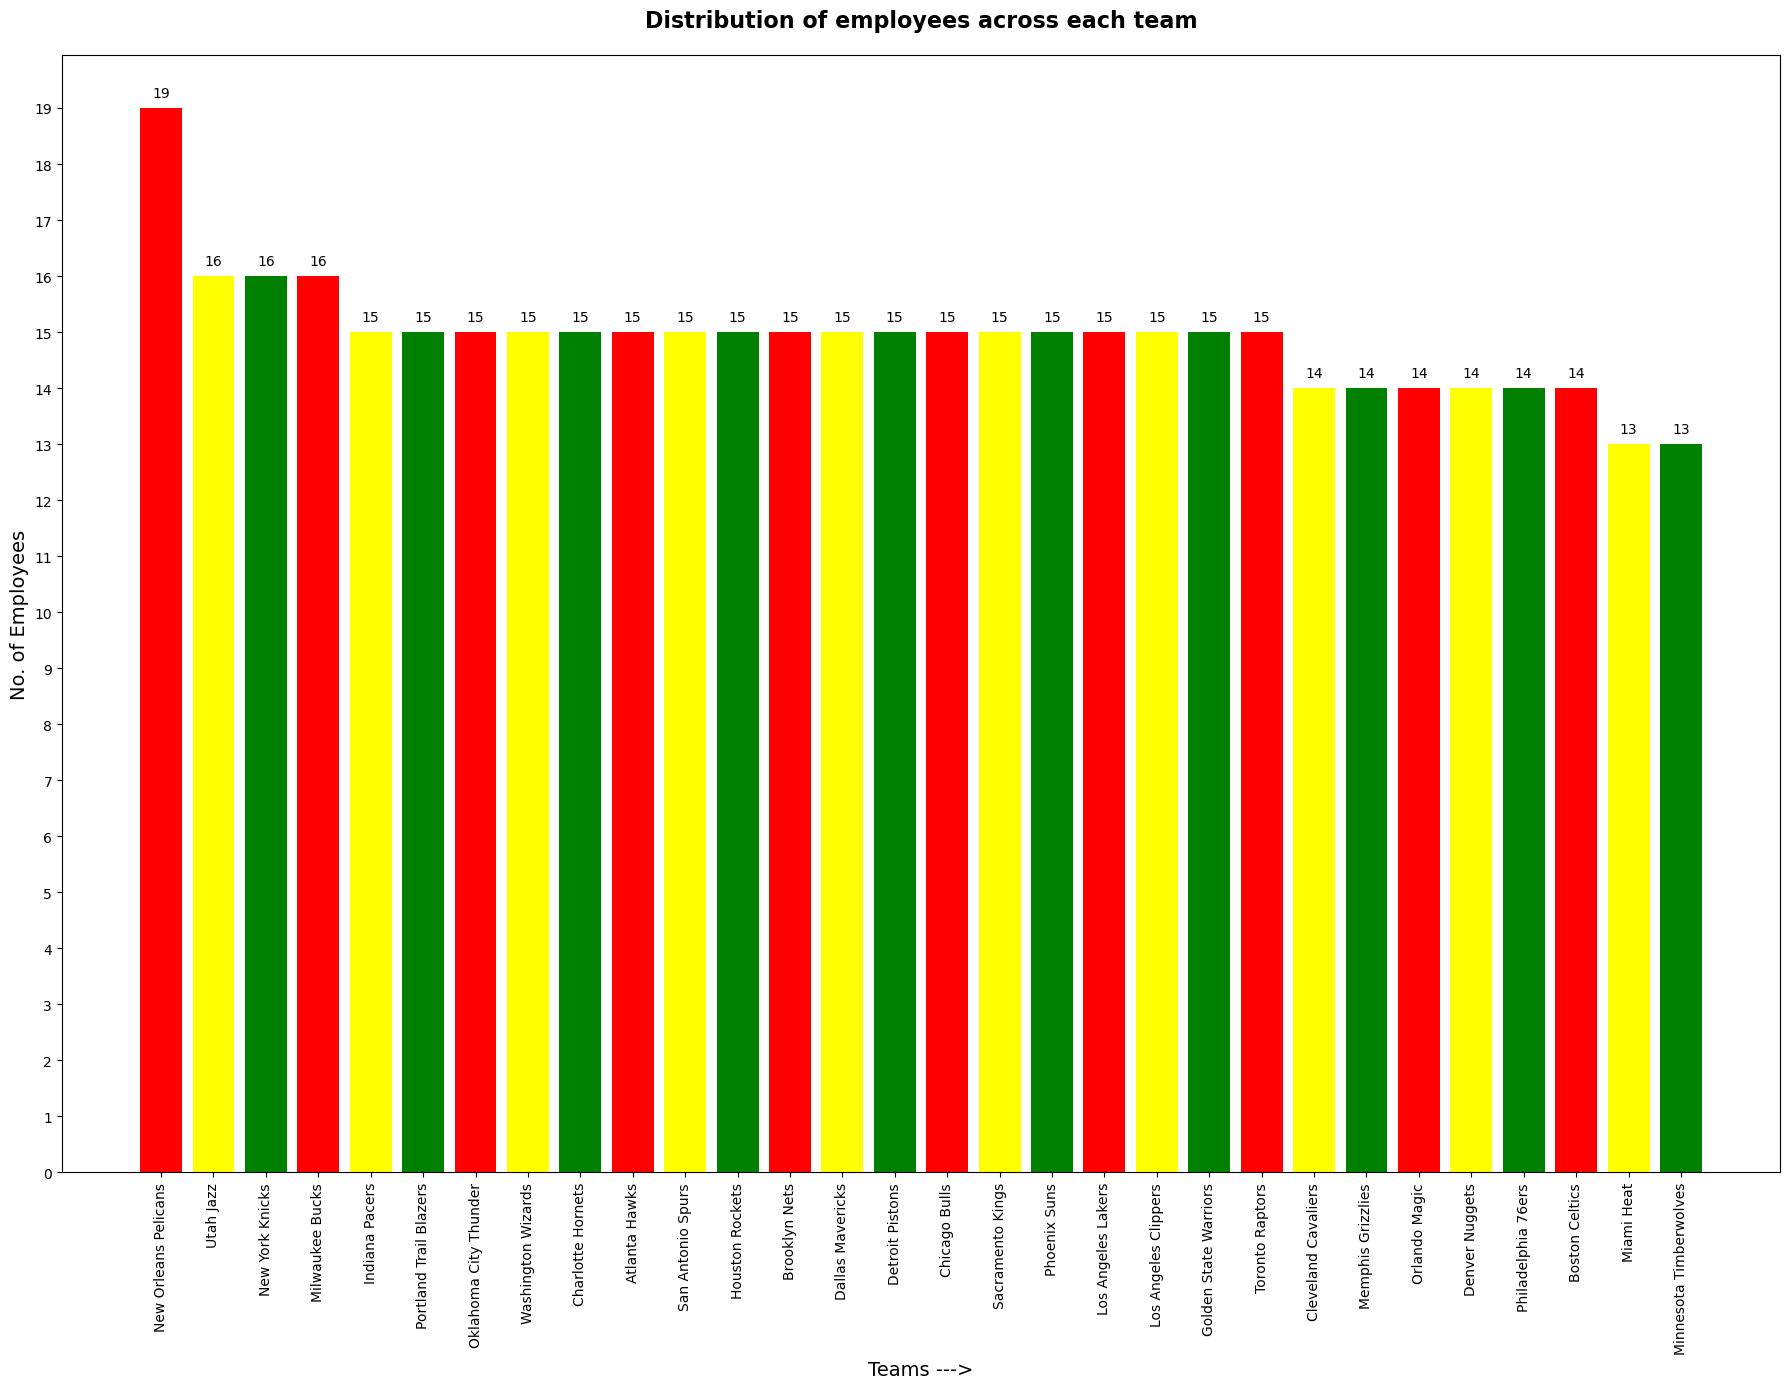

In [131]:
plt.figure(figsize = (18,14)) #Optimize the size of chart
col = ["Red", "Yellow", "Green"] #To give different colors to bars
plt.bar(abc_Teams, dis_emp, color = col) #Plotting the chart
for i in range(len(abc_Teams)): #for adding values on top of each bar
    plt.text(i, dis_emp[i]+0.2,dis_emp[i], ha='center')
plt.xticks(rotation=90) # for rotating the x labels
plt.yticks(ticks=range(0,max(dis_emp)+1)) # for y labels
plt.title('Distribution of employees across each team', fontsize = 16, fontweight='bold', loc='center', pad=20)
plt.xlabel('Teams --->', fontsize = 14)
plt.ylabel('No. of Employees', fontsize = 14)
plt.tight_layout()
plt.show()

The Percentage split of Employees across each team is visulaized below

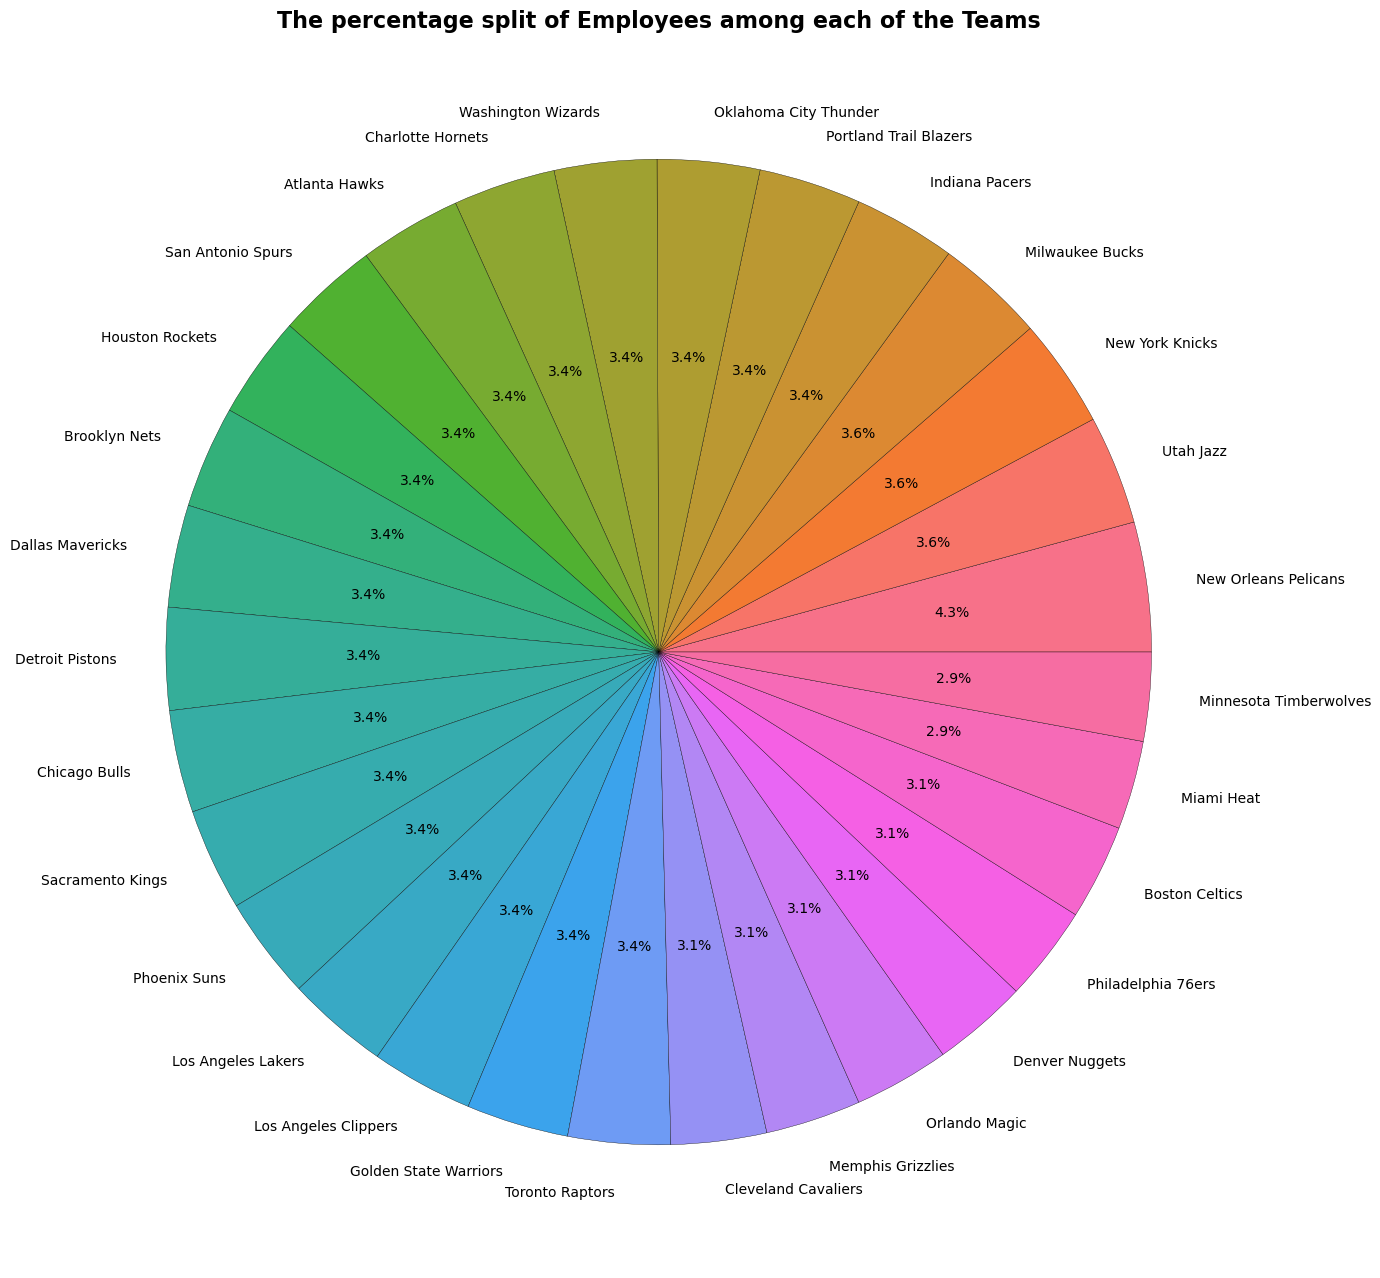

In [137]:
clr_pal = sns.color_palette('husl', len(abc_Teams)) # To get the Color palette variation
plt.figure(figsize=(16,16)) # Optimizing the size of chart
plt.pie(dis_emp, labels = abc_Teams, autopct='%1.1f%%', startangle = 0, colors = clr_pal,
       wedgeprops={'edgecolor': 'black','linewidth':0.25}) #
plt.title('The percentage split of Employees among each of the Teams', fontsize = 16, fontweight = 'bold')
plt.show()


### Segregate employees based on their positions within the company.

In [133]:
abc_1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,156,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,178,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,150,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,160,231,Kansas,947276.0


In [206]:
segg_count = abc_1.groupby('Position').count()['Name'] # To get the count of each position
segg_count

Position
C     79
PF    97
PG    88
SF    84
SG    99
Name: Name, dtype: int64

In [207]:
# Segregate employees based on their positions within the company.
employee_in_C_pos = abc_1[abc_1['Position'].isin(['C'])] # filter employees based on their position (c)
employee_in_PF_pos = abc_1[abc_1['Position'].isin(['PF'])] # filter employees based on their position (PF)
employee_in_PG_pos = abc_1[abc_1['Position'].isin(['PG'])] # filter employees based on their position (PG)
employee_in_SF_pos = abc_1[abc_1['Position'].isin(['SF'])] # filter employees based on their position (SF)
employee_in_SG_pos = abc_1[abc_1['Position'].isin(['SG'])] # filter employees based on their position (SG)

In [203]:
employee_in_PF_pos # testing

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,175,235,LSU,1170960.0
24,Chris McCullough,Brooklyn Nets,1,PF,21,177,200,Syracuse,1140240.0
25,Willie Reed,Brooklyn Nets,33,PF,26,163,220,Saint Louis,947276.0
...,...,...,...,...,...,...,...,...,...
435,Meyers Leonard,Portland Trail Blazers,11,PF,24,165,245,Illinois,3075880.0
441,Noah Vonleh,Portland Trail Blazers,21,PF,20,168,240,Indiana,2637720.0
442,Trevor Booker,Utah Jazz,33,PF,28,175,228,Clemson,4775000.0
446,Derrick Favors,Utah Jazz,15,PF,24,150,265,Georgia Tech,12000000.0


#### Plotting the count according to position

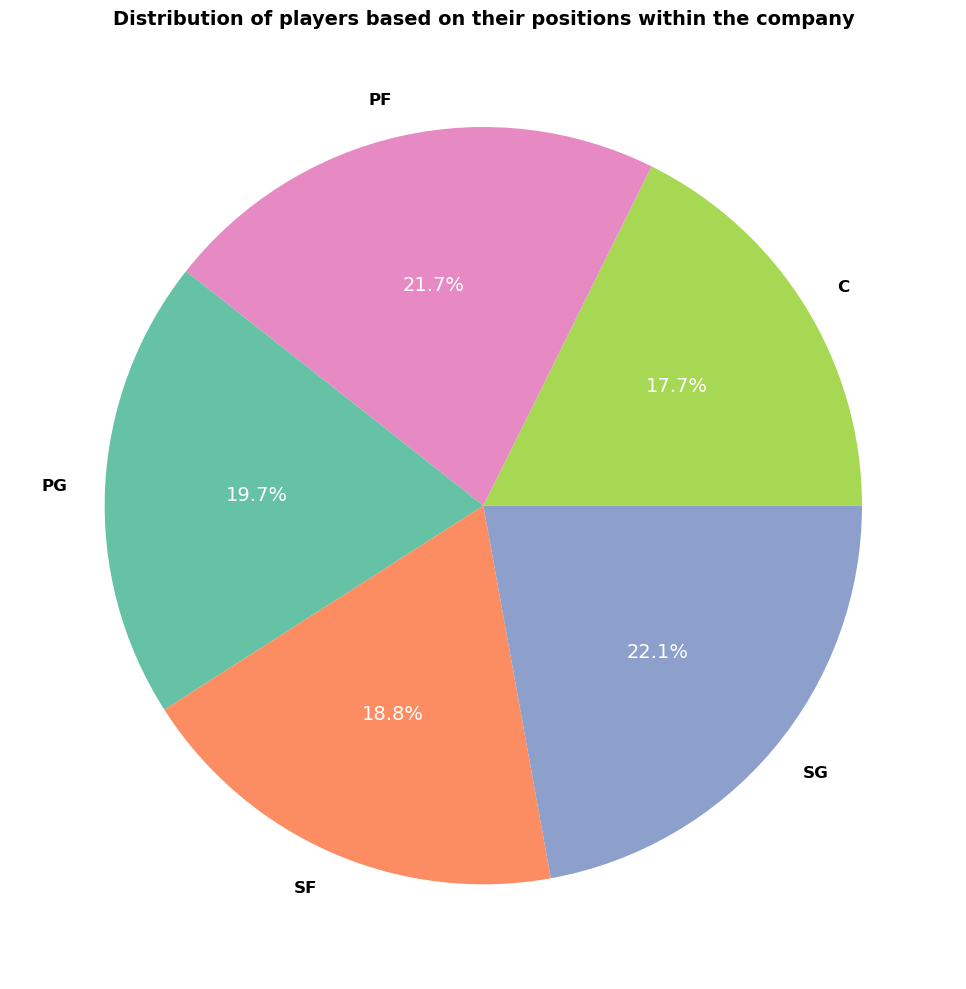

In [209]:
labels = segg_count.index.tolist()
plt.figure(figsize=(10,10))    # Adjust figure size (width, height)
colors = {'PG':'#66c2a5', 'SF':'#fc8d62','SG':'#8da0cb','PF':'#e78ac3','C':'#a6d854'}
ordered_colors = [colors[label] for label in labels]
autotexts = plt.pie(segg_count,labels=labels,autopct='%1.1f%%', startangle=0, colors=ordered_colors ,textprops={'fontsize': 12, 'fontweight': 'bold'})[2] # Plot pie chart
for autotext in autotexts:      # Set the percentage text color to white
    autotext.set_color('white')
    autotext.set_fontsize(14)   # Set the percentage text size
    autotext.set_fontweight('normal')
plt.title('Distribution of players based on their positions within the company',fontsize=14,fontweight='bold') # Add title
plt.tight_layout() # Adjust layout
plt.show() # Show the pie chart

From the pie chart , we can see that SG position has the highest percentage of players with 22
1%

### Identify the predominant age group among employees.

In [160]:
abc_1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,156,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,178,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,150,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,160,231,Kansas,947276.0


In [162]:
age_group = abc_1['Age'].value_counts() # To view the count according to age
age_group

Age
25    45
24    45
27    40
23    39
26    36
28    30
30    30
29    27
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     8
38     4
37     3
40     3
39     2
19     2
Name: count, dtype: int64

From here it is evident that the predominant age groups are of 24 & 25, So let's show & Vizulaize it

In [164]:
print(f"The predominant age group among players is {age_group[age_group == age_group.max()].index.tolist()}")

The predominant age group among players is [25, 24]


In [165]:
age_max = age_group.max() #To get the max age value
age_max

45

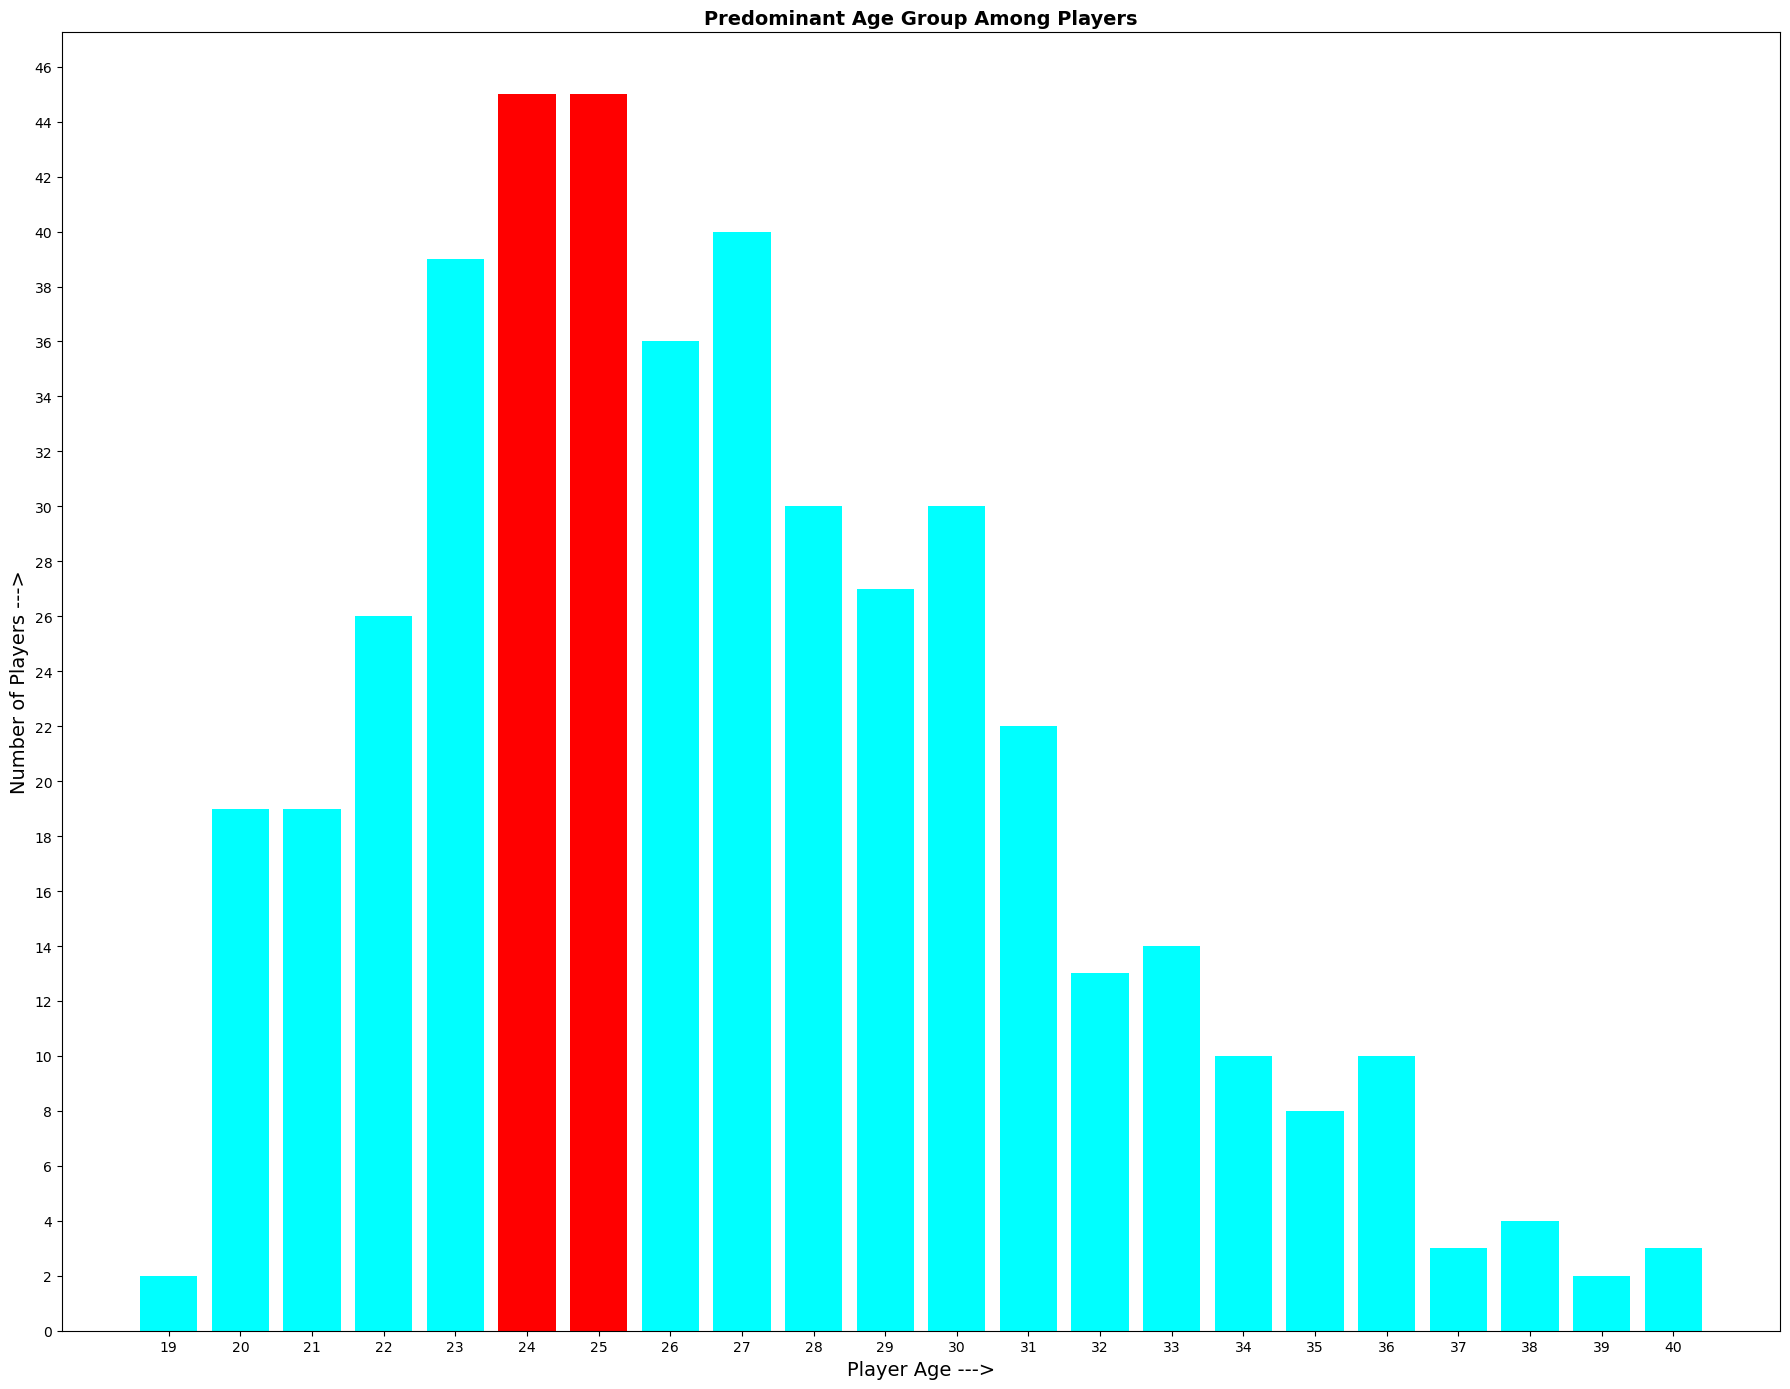

In [166]:
colors = ['Cyan' if y != age_max else 'Red' for y in age_group.values] # Creating Color list
# Draw bar plot
plt.figure(figsize=(18, 14))
plt.bar(age_group.index, age_group.values,color=colors)  ## age , age count
plt.title('Predominant Age Group Among Players', fontsize=14, fontweight='bold')
plt.xlabel('Player Age --->', fontsize=14)
plt.ylabel('Number of Players --->', fontsize=14)
plt.xticks(age_group.index)
plt.yticks(ticks=range(0, max(age_group.values) + 2, 2))
plt.tight_layout()
plt.show()

#### From the above plot it is evident that the 24 & 25 are the predominant age groups

### Discover which team and position have the highest salary expenditure.

In [168]:
abc_1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,156,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,178,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,150,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,160,231,Kansas,947276.0


In [172]:
abc_sal_group = abc_1.groupby(['Team', 'Position'], as_index=False)['Salary'].sum()  # Group by 'Team' and 'Position and sum salary for each position within the group
abc_sal_group

,Team,Position,Salary
0,Atlanta Hawks,C,22756250.0
1,Atlanta Hawks,PF,23952268.0
2,Atlanta Hawks,PG,9763400.0
3,Atlanta Hawks,SF,6000000.0
4,Atlanta Hawks,SG,10431032.0
...,...,...,...
144,Washington Wizards,C,24490429.0
145,Washington Wizards,PF,11300000.0
146,Washington Wizards,PG,18022415.0
147,Washington Wizards,SF,11158800.0


In [173]:
ht_sal_exp_abc = abc_sal_group.groupby(['Team'], as_index=False)['Salary'].sum() # group by team and sum salary of each team
ht_sal_exp_abc.head() # show first five

,Team,Salary
0,Atlanta Hawks,72902950.0
1,Boston Celtics,58541068.0
2,Brooklyn Nets,52528475.0
3,Charlotte Hornets,78340920.0
4,Chicago Bulls,86783378.0


In [174]:
# To Find the team having the highest salary expenditure.
high_sal_team_data = ht_sal_exp_abc.loc[ht_sal_exp_abc['Salary'].idxmax()] #to find the label with maximum value
print(f"The team having the highest salary expenditure is {high_sal_team_data.iloc[0]}")
print(f"and the salary expenditure is ${high_sal_team_data.iloc[1]}")

The team having the highest salary expenditure is Cleveland Cavaliers
and the salary expenditure is $106988689.0


In [176]:
abc_sal_group[abc_sal_group['Team'] == 'Cleveland Cavaliers'] 

,Team,Position,Salary
24,Cleveland Cavaliers,C,20486870.0
25,Cleveland Cavaliers,PF,27882029.0
26,Cleveland Cavaliers,PG,19654777.0
27,Cleveland Cavaliers,SF,23917776.0
28,Cleveland Cavaliers,SG,15047237.0


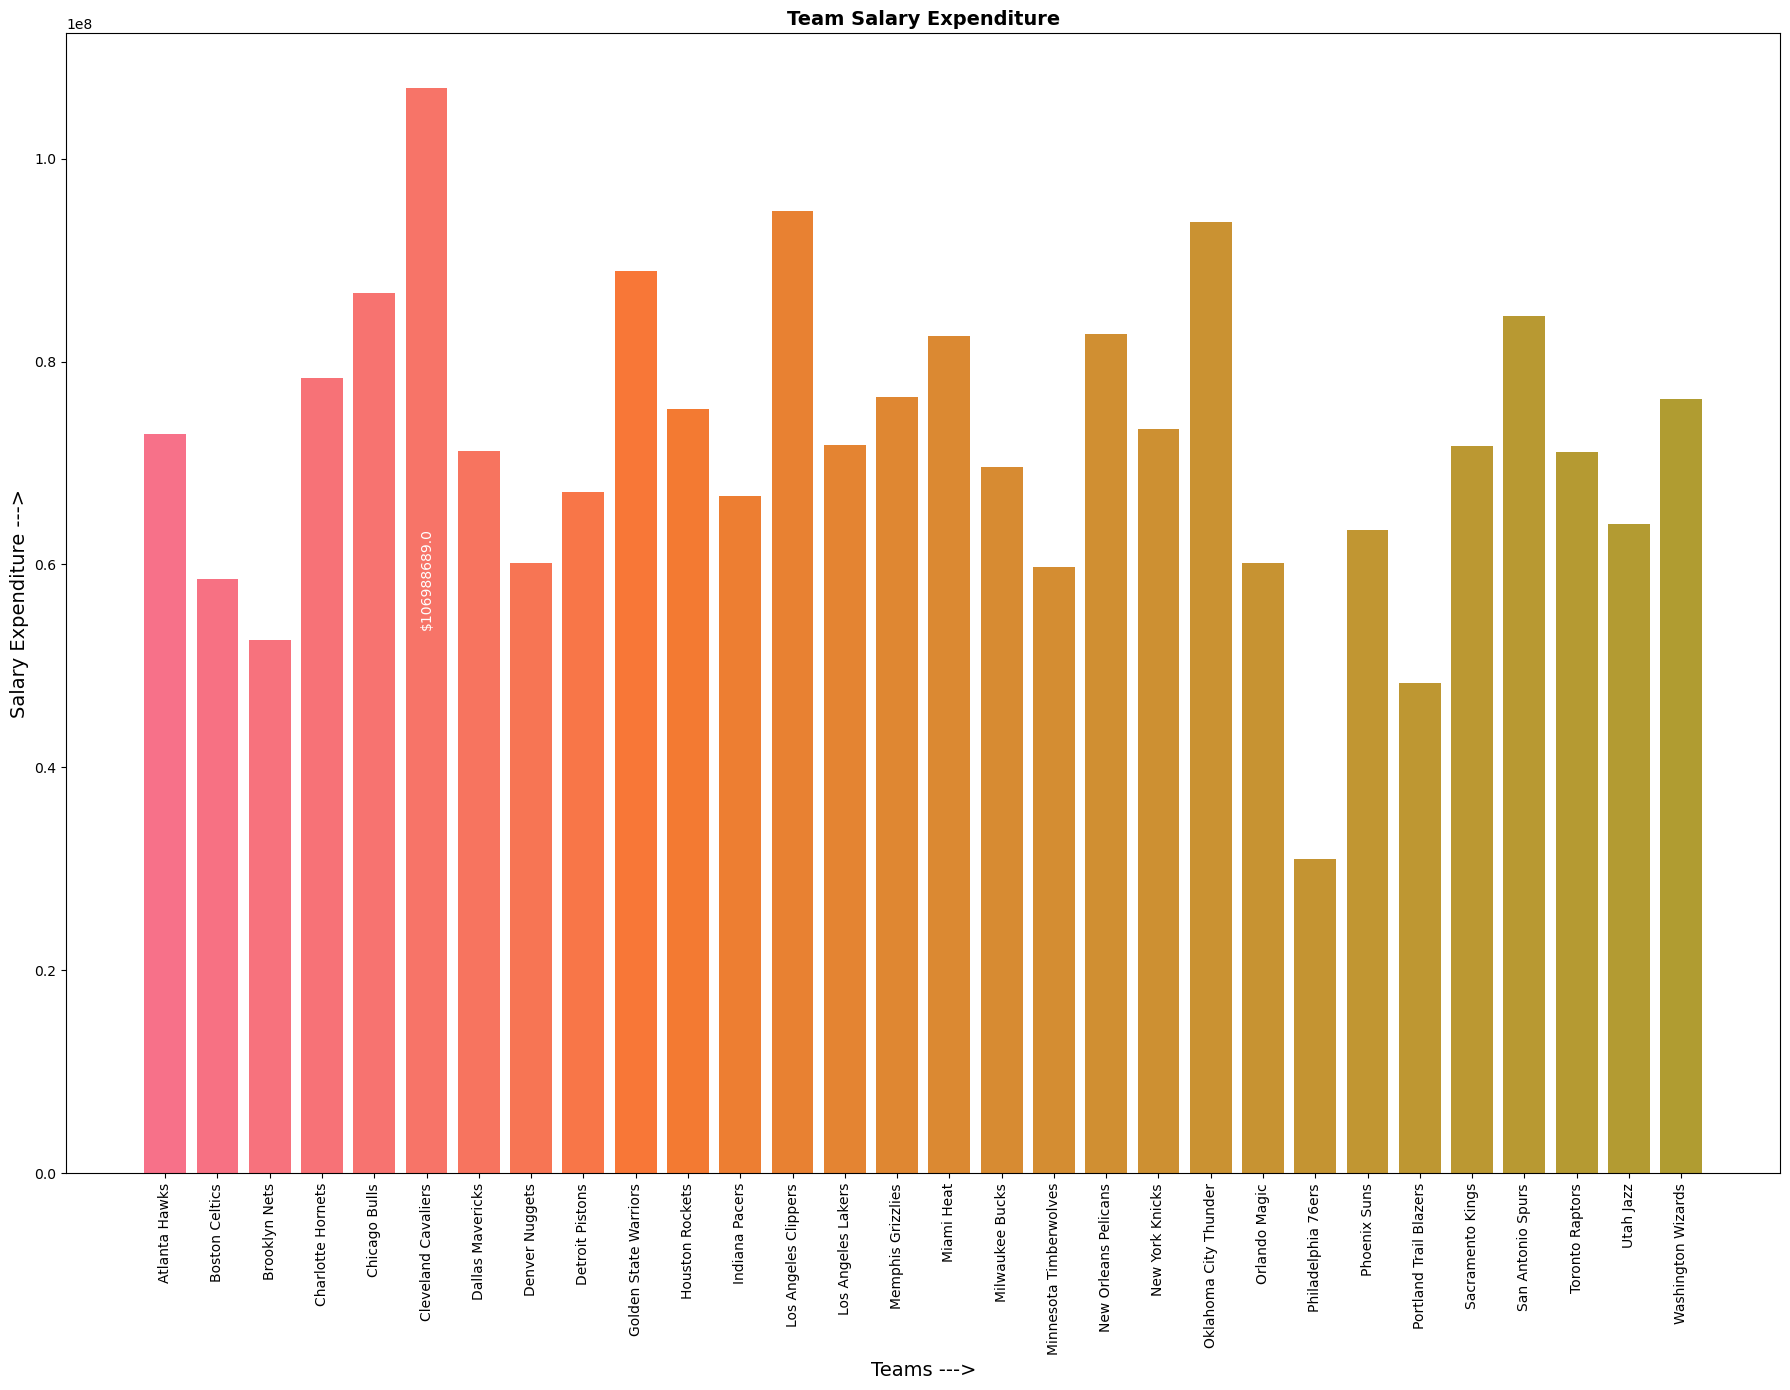

In [184]:
# Graphical representation of the team having the highest salary expenditure
plt.figure(figsize=(18, 14))
color_palette = sns.color_palette('husl', len(abc_sal_group))
plt.bar(ht_sal_exp_abc.Team, ht_sal_exp_abc.Salary, color=color_palette)
plt.title('Team Salary Expenditure', fontsize=14, fontweight='bold')
plt.xlabel('Teams --->', fontsize=14)
plt.ylabel('Salary Expenditure --->', fontsize=14)
plt.xticks(rotation=90)
highest_salary = ht_sal_exp_abc.Salary.max()
highest_salary_index = ht_sal_exp_abc.Salary.idxmax()
plt.text(highest_salary_index, highest_salary/2, '$'+str(highest_salary), color='white', ha='center', va='bottom',rotation=90)
plt.tight_layout()
plt.show()

#### From the above plot we can see that Cleveland Cavaliers has the highest team salary expenditure

In [186]:
# Find position having the highest overall salary expenditure
pos_salary_abc = abc_sal_group.groupby(['Position'], as_index=False)['Salary'].sum()
highest_pos_salary_exp_abc = pos_salary_abc.loc[pos_salary_abc['Salary'].idxmax()]
print(f"The position having the highest overall salary expenditure is {highest_pos_salary_exp_abc.iloc[0]}")
print(f"and the salary expenditure is ${highest_pos_salary_exp_abc.iloc[1]}")
     

The position having the highest overall salary expenditure is C
and the salary expenditure is $466377332.0


In [187]:
pos_salary_abc

,Position,Salary
0,C,466377332.0
1,PF,442560850.0
2,PG,446848971.0
3,SF,408020976.0
4,SG,396976258.0


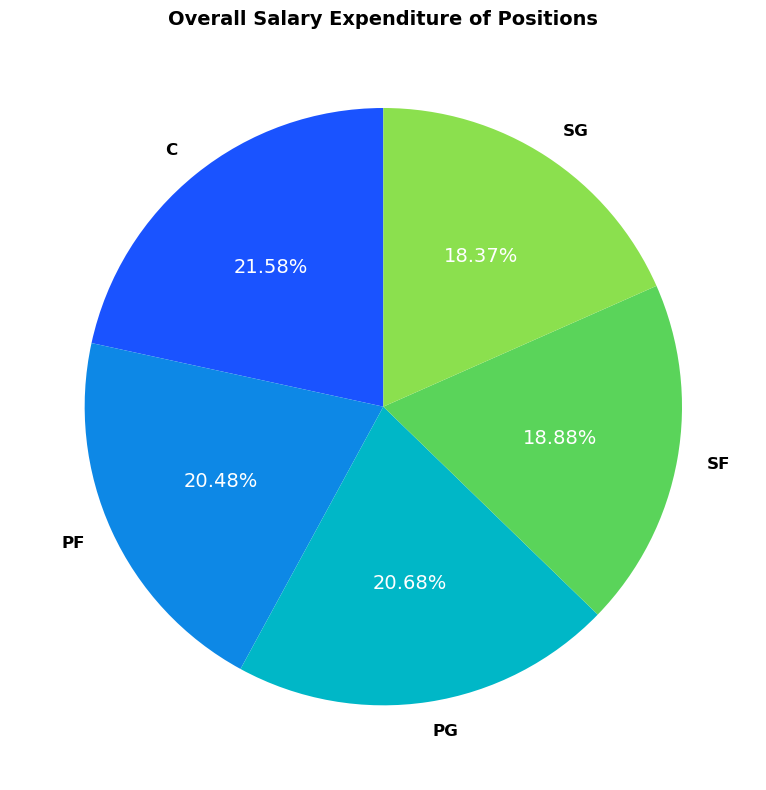

In [188]:
plt.figure(figsize=(12, 8))
autotexts = plt.pie(pos_salary_abc['Salary'], labels=pos_salary_abc['Position'], autopct='%1.2f%%', startangle=90, colors=["#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e"],textprops={'fontsize': 12, 'fontweight': 'bold'})[2]
for autotext in autotexts:      # Set the percentage text color to white
    autotext.set_color('white')
    autotext.set_fontsize(14)   # Set the percentage text size
    autotext.set_fontweight('normal')
plt.title('Overall Salary Expenditure of Positions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### From the above pie chart it is clear that the position 'C' which has the highest salary expenditure percentage as 21.58%

### Investigate if there's any correlation between age and salary, and represent it visually.

In [211]:
abc_1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,156,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,178,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,150,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,160,231,Kansas,947276.0


In [212]:
corr_abc = abc_1[['Age', 'Salary']].corr() # Calculating the co-relation matrix
corr_abc

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


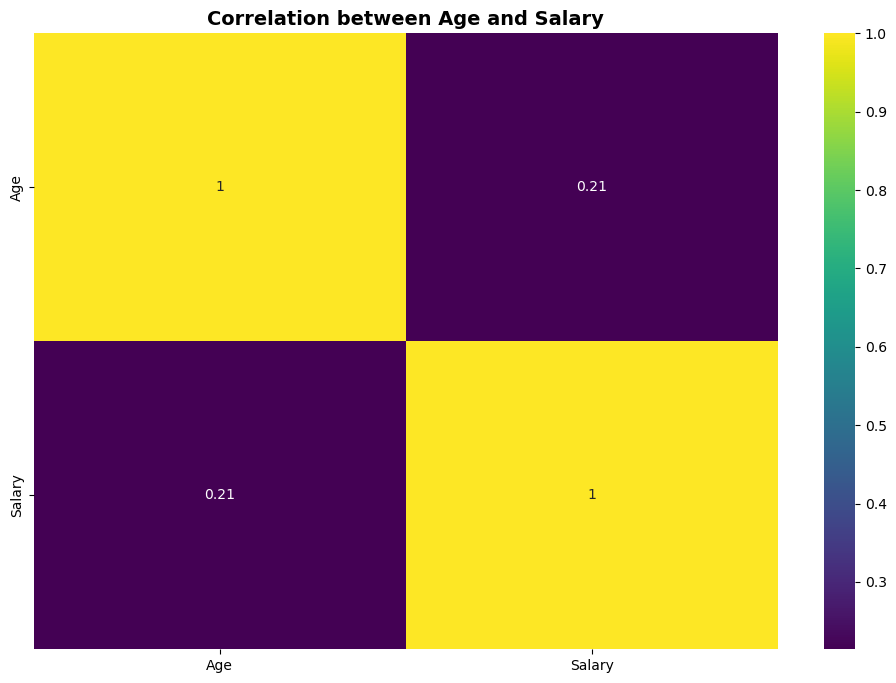

In [213]:

# Plot heatmap to represent it visually
plt.figure(figsize=(12, 8))
sns.heatmap(corr_abc, annot=True, cmap='viridis')
plt.title('Correlation between Age and Salary', fontsize=14, fontweight='bold')
plt.show()
     

#### From the heat map it is evident that there is very low corelation between age & Salary